# Experiment `20200423a` 

In [1]:
import numpy as np  

import pyUn0 as pyUn0

import pickle

import os

from scipy.signal import hilbert
from scipy import ndimage, signal 

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

Not loading RPi.GPIO as not on RPi
pyexiv2 does not exist on RPi


In [2]:
def loadPkl(jsonID):
    pkl_file = open("data/20200418a"+str(jsonID)+'.pkl', 'rb')
    data1 = pickle.load(pkl_file)
    pkl_file.close()
    return data1

In [28]:
np.abs(uA.FFT_y)

array([16879.79296875,  1684.05202692,   788.05203215, ...,
         505.7908732 ,   788.05203215,  1684.05202692])

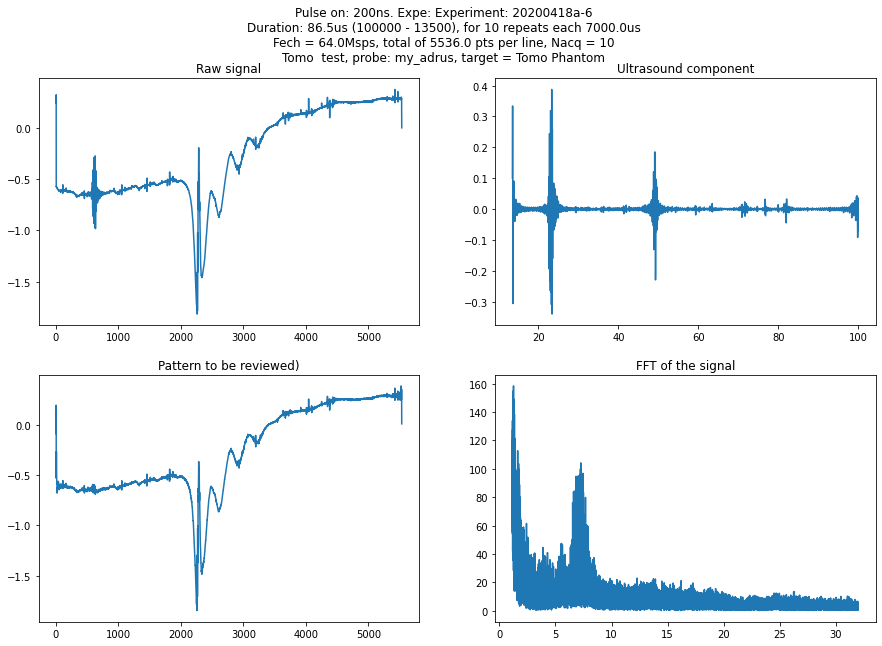

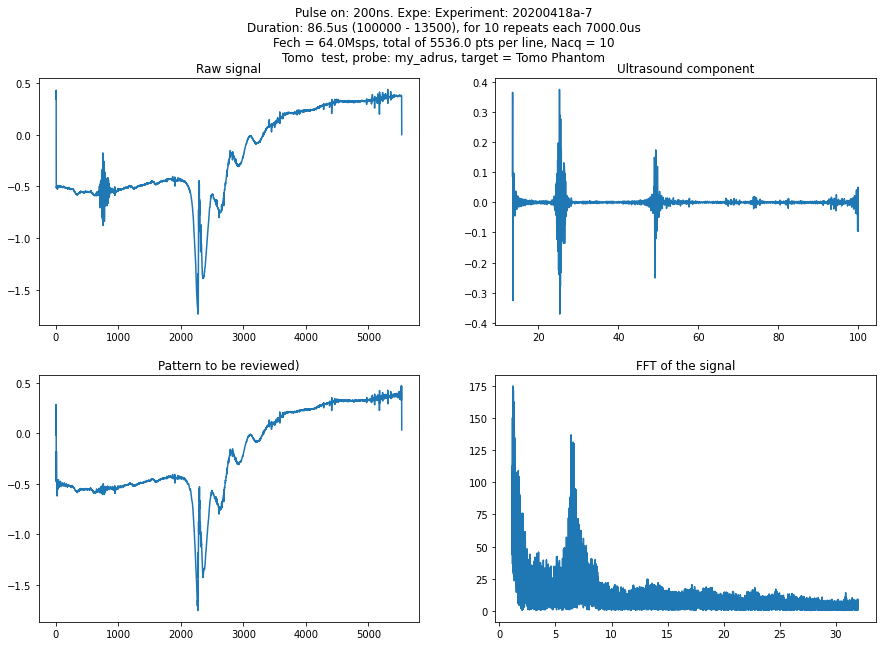

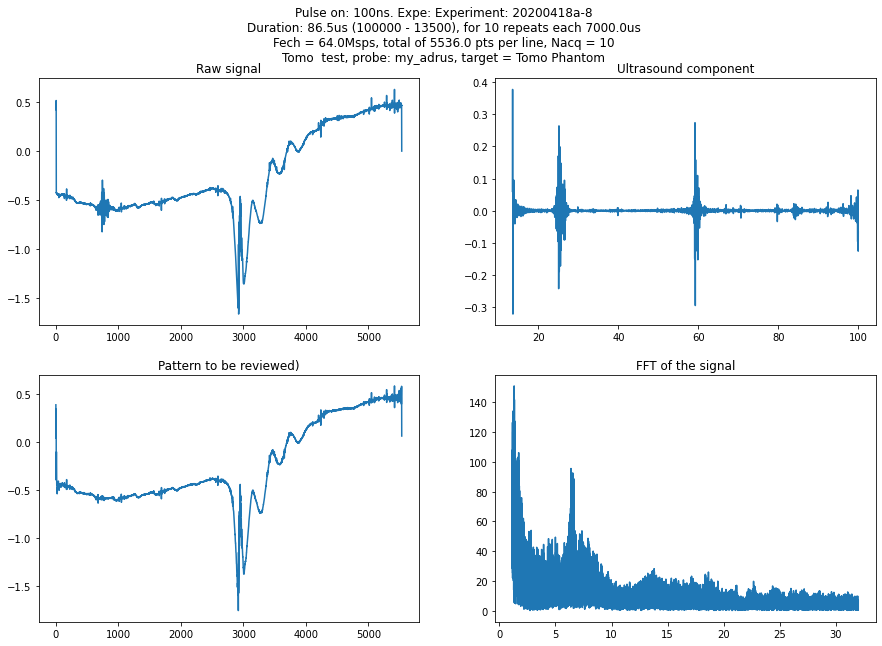

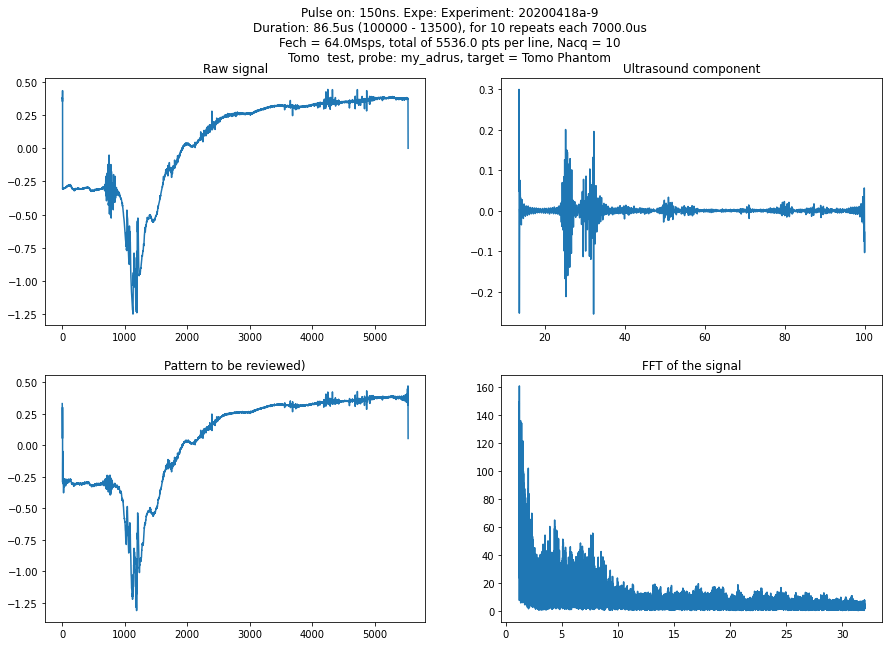

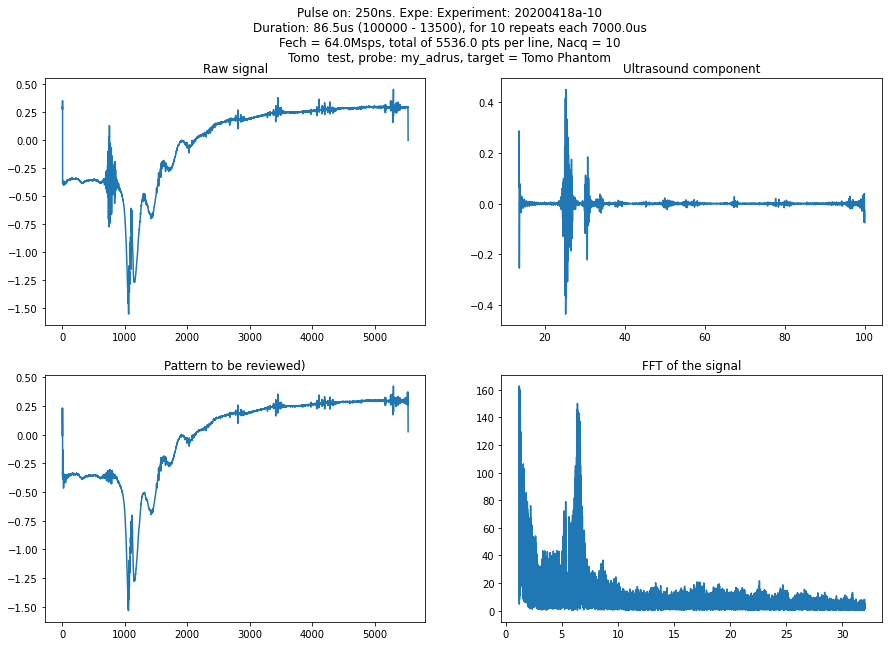

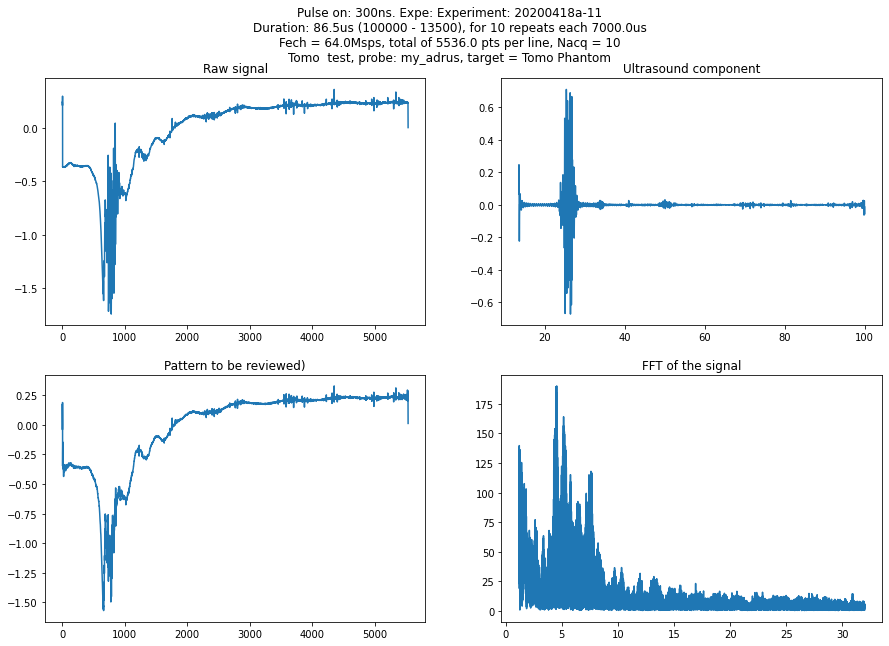

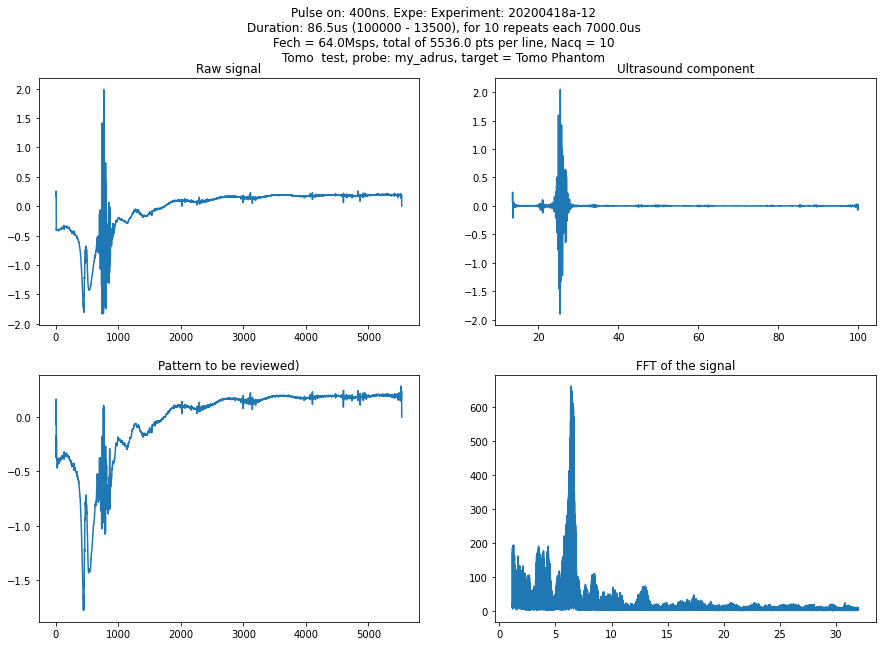

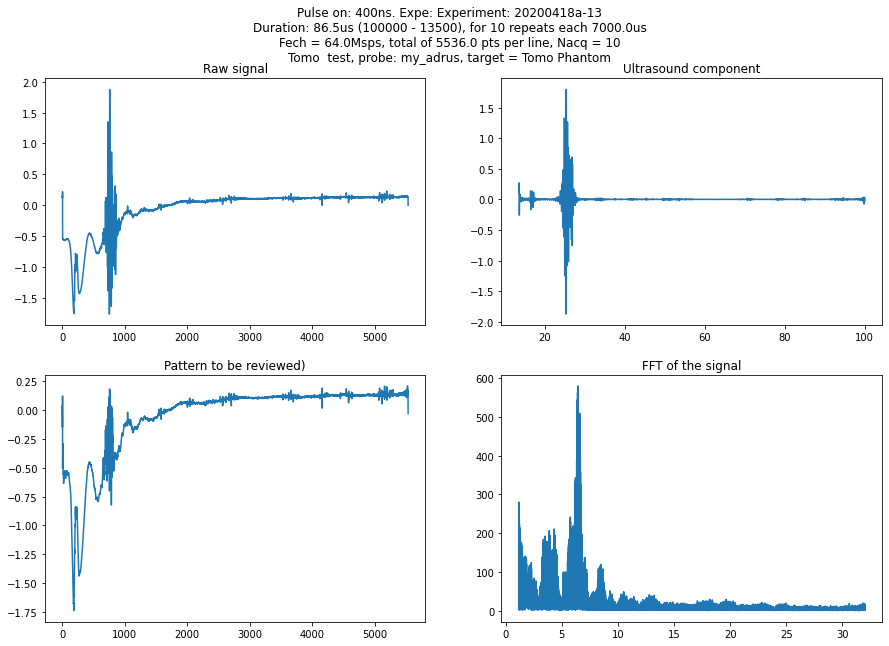

In [55]:
for k in [6,7,8,9,10,11,12,13]:
    
    uA = loadPkl(k) # filtered_image, signal

    t = uA.t[0:len(uA.filtered_image[0])]
    FFT = np.abs(uA.FFT_y)
    L = len(uA.FFT_y)
    f = [x*64.0/L for x in range(L)]
    plt.figure()
    titleExpe = "Pulse on: "+str(uA.timings["t1"])+ "ns. Expe: "+uA.create_title_text()
    plt.suptitle(titleExpe) 

    plt.subplot(2,2,1)
    plt.plot(np.average(uA.raw_2d_image[3:],axis=0))
    plt.title('Raw signal')

    plt.subplot(2,2,2)
    plt.plot(t,np.average(uA.filtered_image[3:],axis=0))
    plt.title('Ultrasound component')

    plt.subplot(2,2,3)
    plt.plot(np.average(uA.raw_2d_image[3:],axis=0) - np.average(uA.filtered_image[3:],axis=0))
    plt.title('Pattern to be reviewed)')

    plt.subplot(2,2,4)
    plt.plot(f[1000:int(L/2)],FFT[1000:int(L/2)])
    plt.title('FFT of the signal')

    plt.savefig("./images/_pon"+str(uA.timings["t1"])+ "ns_pattern_"+uA.experiment["id"]+"-"+str(uA.N)+".jpg")

400